In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
df = pd.read_excel('stresslevel.xlsx')
df[['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']] = df[
    ['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']
].apply(pd.to_numeric, errors='coerce')


#Histogram

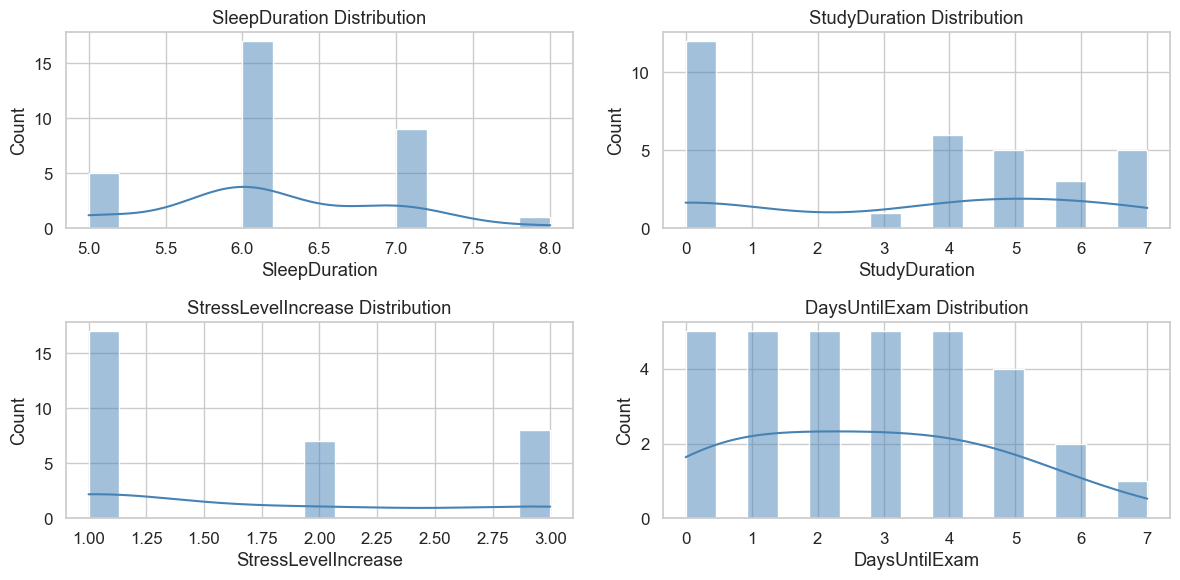

In [38]:

plt.figure(figsize=(12, 6))
for i, column in enumerate(['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[column], bins=15, kde=True, color='steelblue')
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()


#Boxplot 

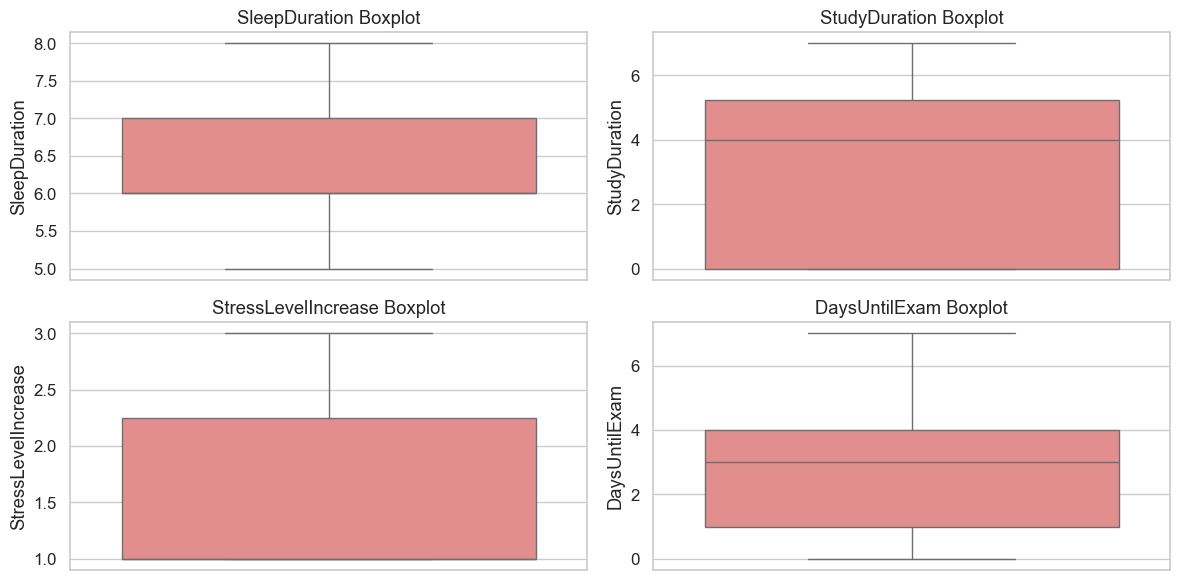

In [39]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[column], color='lightcoral')
    plt.title(f'{column} Boxplot')
plt.tight_layout()
plt.show()

#Scatterplot + Trendline 


<Figure size 1200x600 with 0 Axes>

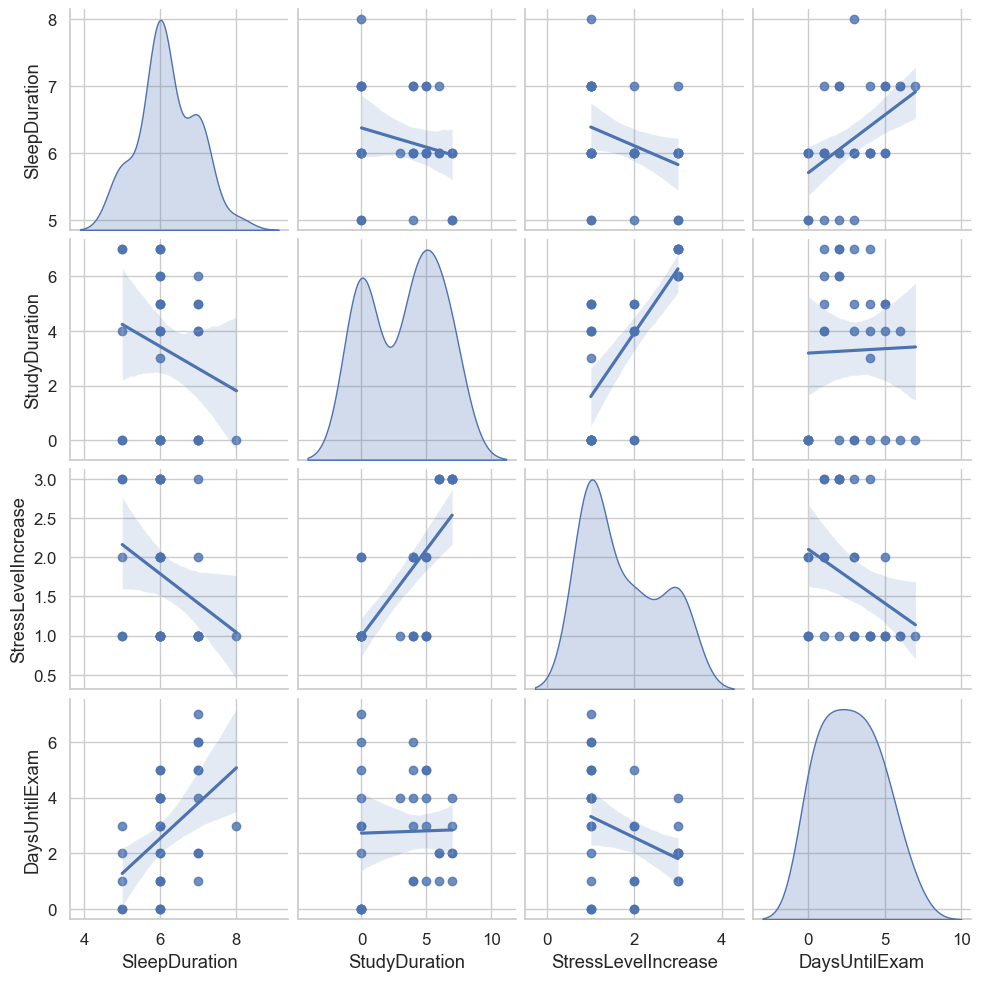

In [40]:
plt.figure(figsize=(12, 6))
sns.pairplot(df[['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']], kind='reg', diag_kind='kde')
plt.show()

#Heatmap

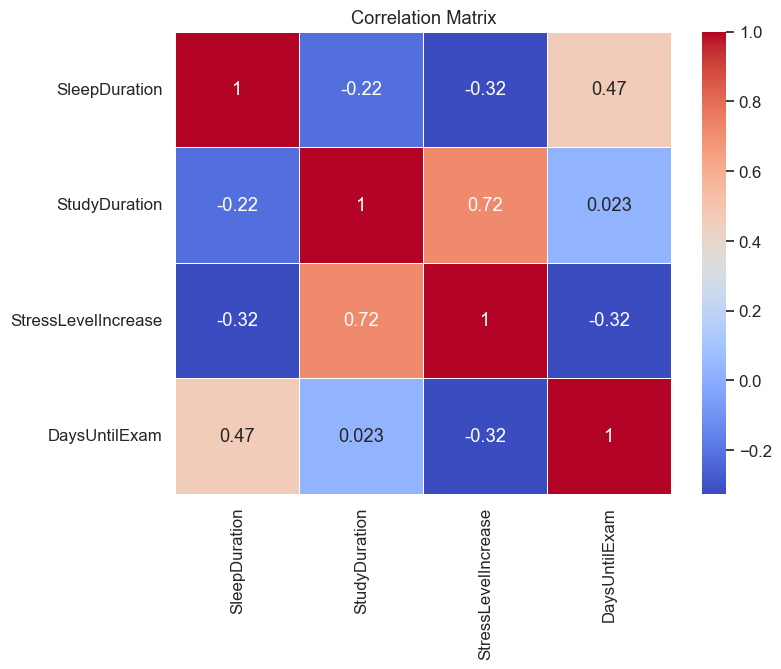

In [41]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#Regression Analysis


In [42]:
X = df[['SleepDuration', 'StudyDuration', 'DaysUntilExam']]
X = sm.add_constant(X)  # Sabit terimi ekle
y = df['StressLevelIncrease']

model = sm.OLS(y, X).fit()  # Modeli eğit
print(model.summary())  # Regresyon analizini yazdır

                             OLS Regression Results                            
Dep. Variable:     StressLevelIncrease   R-squared:                       0.630
Model:                             OLS   Adj. R-squared:                  0.590
Method:                  Least Squares   F-statistic:                     15.89
Date:                 Sat, 17 May 2025   Prob (F-statistic):           3.16e-06
Time:                         01:13:59   Log-Likelihood:                -23.842
No. Observations:                   32   AIC:                             55.68
Df Residuals:                       28   BIC:                             61.55
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4777      0.937 

#Scatter Plot (Sleep Duration vs. Stress Level Increase)


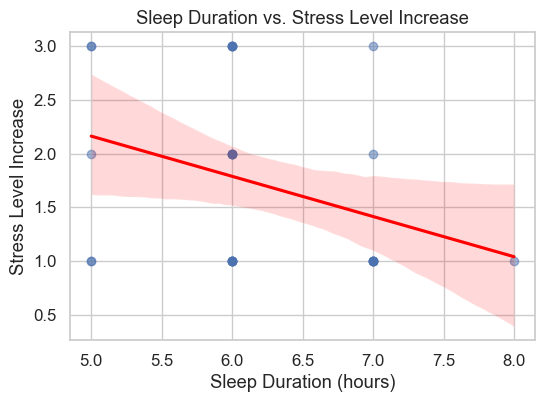

In [43]:
plt.figure(figsize=(6, 4))
sns.regplot(x=df['SleepDuration'], y=df['StressLevelIncrease'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Sleep Duration vs. Stress Level Increase')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level Increase')
plt.show()

#Scatter Plot (Study Duration vs. Stress Level Increase)

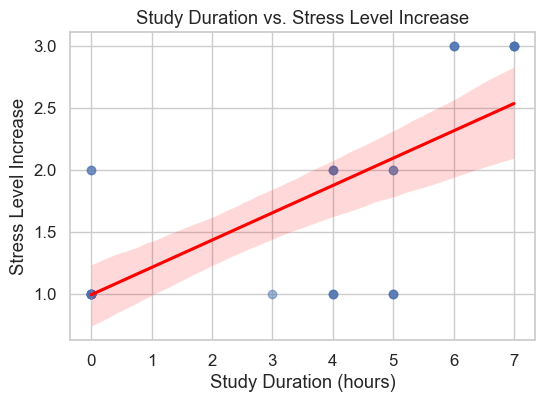

In [44]:
plt.figure(figsize=(6, 4))
sns.regplot(x=df['StudyDuration'], y=df['StressLevelIncrease'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Study Duration vs. Stress Level Increase')
plt.xlabel('Study Duration (hours)')
plt.ylabel('Stress Level Increase')
plt.show()

#Hypothesis Tests

In [45]:
import pandas as pd
import scipy.stats as stats

# Load dataset
df = pd.read_excel("stresslevel.xlsx")

# Ensure numeric columns are correctly formatted
numeric_columns = ['StudyDuration', 'SleepDuration', 'StressLevelIncrease', 'DaysUntilExam']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert categorical variable IsExamDay to binary
df['IsExamDay'] = df['IsExamDay'].map({'Yes': 1, 'No': 0})

# Drop NaN values
df = df.dropna()

print("=== Hypothesis Testing ===\n")

def format_p(p):
    return "< 0.0001" if p < 0.0001 else f"{p:.6f}"

# 1. Mann-Whitney U Test
exam_days = df[df['IsExamDay'] == 1]['StressLevelIncrease']
non_exam_days = df[df['IsExamDay'] == 0]['StressLevelIncrease']
u_stat, p_u = stats.mannwhitneyu(exam_days, non_exam_days, alternative='two-sided')
print(f"📌 Mann-Whitney U Test (Stress Increase on Exam vs Non-Exam Days):")
print(f"   U = {u_stat:.3f}, p = {format_p(p_u)}")
print("   ✅ Significant" if p_u < 0.05 else "   ❌ Not significant", "\n")

# 2. Kruskal-Wallis Test
df['Route'] = df['Route'].astype(str)
groups = [group['StudyDuration'].dropna() for name, group in df.groupby('Route')]
h_stat, p_kruskal = stats.kruskal(*groups)
print(f"📌 Kruskal-Wallis Test (Study Duration by Route):")
print(f"   H = {h_stat:.3f}, p = {format_p(p_kruskal)}")
print("   ✅ Significant" if p_kruskal < 0.05 else "   ❌ Not significant", "\n")

# 3. Spearman Correlation (Sleep vs Stress)
rho_spearman_sleep, p_spearman_sleep = stats.spearmanr(df['SleepDuration'], df['StressLevelIncrease'])
print("📌 Spearman Correlation (Sleep Duration vs Stress Increase):")
print(f"   r = {rho_spearman_sleep:.3f}, p = {format_p(p_spearman_sleep)}")
print("   ✅ Significant" if p_spearman_sleep < 0.05 else "   ❌ Not significant", "\n")

# 4. Pearson Correlation (Sleep vs Stress)
rho_pearson_sleep, p_pearson_sleep = stats.pearsonr(df['SleepDuration'], df['StressLevelIncrease'])
print("📌 Pearson Correlation (Sleep Duration vs Stress Increase):")
print(f"   r = {rho_pearson_sleep:.3f}, p = {format_p(p_pearson_sleep)}")
print("   ✅ Significant" if p_pearson_sleep < 0.05 else "   ❌ Not significant", "\n")

# 5. Spearman Correlation (Study vs Stress)
rho_spearman_study, p_spearman_study = stats.spearmanr(df['StudyDuration'], df['StressLevelIncrease'])
print("📌 Spearman Correlation (Study Duration vs Stress Increase):")
print(f"   r = {rho_spearman_study:.3f}, p = {format_p(p_spearman_study)}")
print("   ✅ Significant" if p_spearman_study < 0.05 else "   ❌ Not significant", "\n")

# 6. Pearson Correlation (Study vs Stress)
rho_pearson_study, p_pearson_study = stats.pearsonr(df['StudyDuration'], df['StressLevelIncrease'])
print("📌 Pearson Correlation (Study Duration vs Stress Increase):")
print(f"   r = {rho_pearson_study:.3f}, p = {format_p(p_pearson_study)}")
print("   ✅ Significant" if p_pearson_study < 0.05 else "   ❌ Not significant")


=== Hypothesis Testing ===

📌 Mann-Whitney U Test (Stress Increase on Exam vs Non-Exam Days):
   U = 54.000, p = 0.457531
   ❌ Not significant 

📌 Kruskal-Wallis Test (Study Duration by Route):
   H = 29.228, p = < 0.0001
   ✅ Significant 

📌 Spearman Correlation (Sleep Duration vs Stress Increase):
   r = -0.334, p = 0.061724
   ❌ Not significant 

📌 Pearson Correlation (Sleep Duration vs Stress Increase):
   r = -0.324, p = 0.070275
   ❌ Not significant 

📌 Spearman Correlation (Study Duration vs Stress Increase):
   r = 0.737, p = < 0.0001
   ✅ Significant 

📌 Pearson Correlation (Study Duration vs Stress Increase):
   r = 0.718, p = < 0.0001
   ✅ Significant


In [46]:
#StressLevelAfter Prediction via Linear Regression (Without Scikit-learn)

In [47]:
import pandas as pd
import numpy as np

# Veriyi yükle
df = pd.read_excel("stresslevel.xlsx")

# Gerekli sütunlar
features = ["StudyDuration", "SleepDuration", "CaffeineIntake", "DaysUntilExam"]
target = "StressLevelAfter"

# Eksik değerleri kontrol et ve doldur
df = df[features + [target]].copy()
df = df.fillna(df.median(numeric_only=True))

# Özellik ve hedef değişken
X = df[features].values
y = df[target].values.reshape(-1, 1)

# Bias terimi (sabit) için X'e bir sütun daha ekle (hepsi 1)
X_b = np.hstack([np.ones((X.shape[0], 1)), X])  # X_b = [1, x1, x2, x3, x4]

# Normal denklem yöntemi ile katsayıları bul (theta)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Tahminler
y_pred = X_b @ theta_best

# Performans metriği (MSE ve R2)
mse = np.mean((y - y_pred)**2)
r2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

# Sonuçlar
print("Coefficients (theta):")
for i, col in enumerate(['Bias'] + features):
    print(f"{col}: {theta_best[i][0]:.4f}")

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Coefficients (theta):
Bias: 6.6839
StudyDuration: 0.0957
SleepDuration: -0.2882
CaffeineIntake: 1.5457
DaysUntilExam: -0.1346

Mean Squared Error (MSE): 0.4715
R² Score: 0.8758


In [48]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Linear Regression - MSE: 0.843, R2: 0.796
Polynomial Regression (degree=3) - MSE: 3.274, R2: 0.206
KNN Regression (k=3) - MSE: 1.127, R2: 0.727


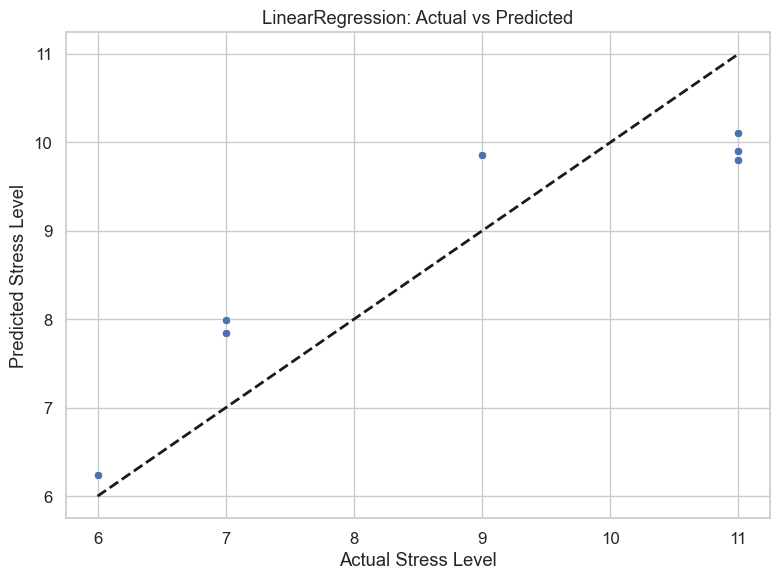

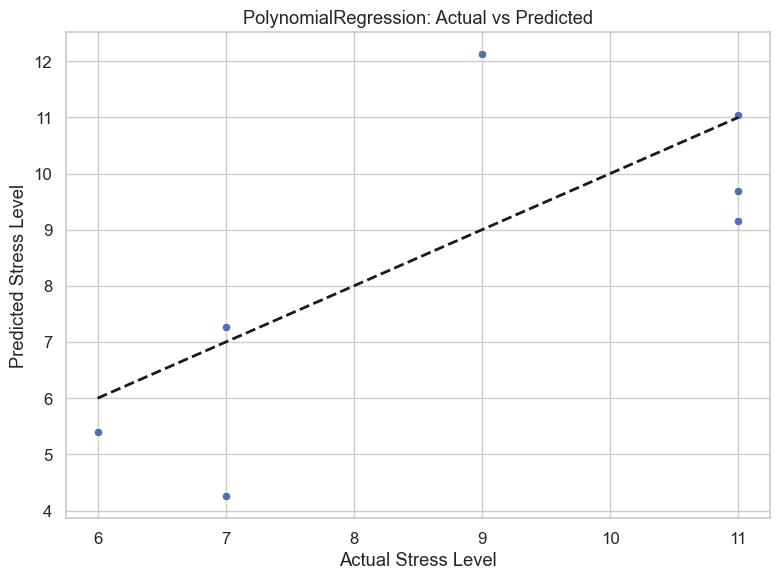

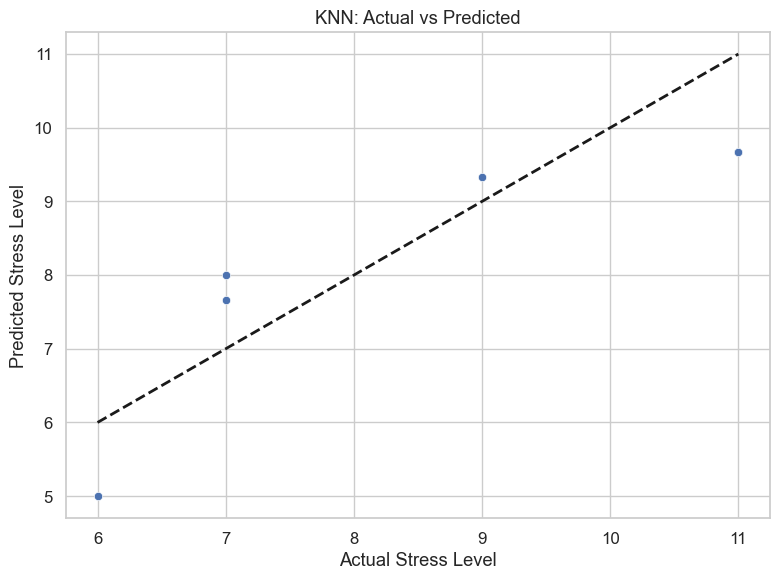

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Veri yükle
df = pd.read_excel("stresslevel.xlsx")
features = ["StudyDuration", "SleepDuration", "DaysUntilExam", "CaffeineIntake"]
X = df[features]
y = df["StressLevelAfter"]

# 2. Eğitim-Test bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# 4. Polynomial Regression (degree=3)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# 5. KNN Regression (k=3)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# 6. Performans metriklerini hesapla
def print_metrics(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - MSE: {mse:.3f}, R2: {r2:.3f}")

print_metrics("Linear Regression", y_test, y_pred_lr)
print_metrics("Polynomial Regression (degree=3)", y_test, y_pred_poly)
print_metrics("KNN Regression (k=3)", y_test, y_pred_knn)

# 7. Sonuçları DataFrame'e koy
results_df = pd.DataFrame({
    "Actual": y_test.reset_index(drop=True),
    "LinearRegression": y_pred_lr,
    "PolynomialRegression": y_pred_poly,
    "KNN": y_pred_knn
})

sns.set(style="whitegrid", font_scale=1.1)

# 8. Grafik fonksiyonu (gerçek vs tahmin)
def plot_predictions(model_name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x="Actual", y=model_name, data=results_df)
    min_val, max_val = results_df["Actual"].min(), results_df["Actual"].max()
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
    plt.title(f"{model_name}: Actual vs Predicted")
    plt.xlabel("Actual Stress Level")
    plt.ylabel("Predicted Stress Level")
    plt.tight_layout()
    plt.show()

for model in ["LinearRegression", "PolynomialRegression", "KNN"]:
    plot_predictions(model)
